In [1]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.api import VAR

## Linear Regression

Short, linear regression assumes of independently and identically distributed data (iid). This is not the case with time series data, where points next to each other tend to be strongly correlated.

Still, OLS can be applied to time series data, when following assumptions are fulfilled:

- time series has a linear response to the target
- each point in time, the expected value of the error is 0
- error at any given time period is uncorrelated with the inputs at any time period in the past or future. So a autocorrelation plot of the errors won't find any pattern
- variance of the error is independent of time

## Statistical Methods

### Autoregressive models

Autoregression uses a regression on past values to predict future values. Also they are used if there are no additional information than the time series itself.

the simplest model looks like:

$$ y_t = b_0 + b_1 + y_{t-1} + e_i$$

with:<br>
- $b_0, b_1$ as a constant <br>
- $y_{t-1}$ value of previous time step <br>
- $e_i$ the error term

This is for AR(1), where only one time lag is considered.

__Weak stationarity__ requires only, that the mean and the variance of a process be time invariant. <br>
__Strong stationarity__ requires, that the distribution of the random variables remains the same over time. 

Also it can be, that strong stationarity exists without weak stationarity. This is the case, when there is no mean or variance, like in the Cauchy distribution.

In [2]:
data = pd.read_csv("../data/Daily_Demand_Forecasting_Orders.csv", sep=";")

In [3]:
colnames = data.columns

In [4]:
data

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


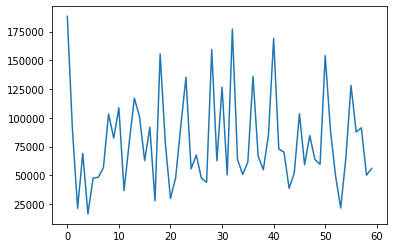

In [5]:
data[colnames[10]].plot()

In [6]:
colnames[10]

'Banking orders (2)'

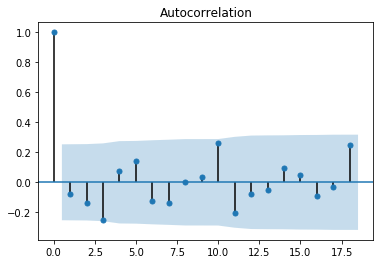

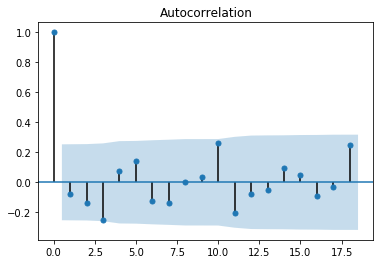

In [7]:
plot_acf(data[colnames[10]])

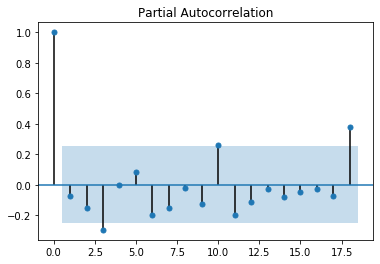

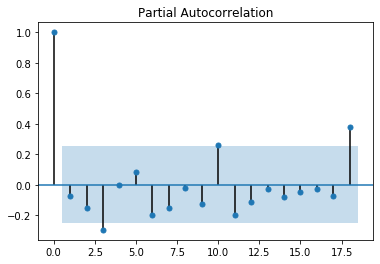

In [8]:
plot_pacf(data[colnames[10]])

The 5% significance threshold of the PACF plot is crossed at lag 3. 

In [9]:
model = ARIMA(data[colnames[10]], order=(3,0,0))
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -717.601
Date:                Wed, 17 Jun 2020   AIC                           1445.202
Time:                        16:39:13   BIC                           1455.674
Sample:                             0   HQIC                          1449.298
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.94e+04   3631.436     21.865      0.000    7.23e+04    8.65e+04
ar.L1         -0.1353      0.181     -0.746      0.456      -0.491       0.220
ar.L2         -0.2016      0.111     -1.810      0.070      -0.420       0.017
ar.L3         -0.3191      0.157     -2.033      0.042      -0.627      -0.011
sigma2       1.27e+09      0.022   5.65e+10      0.000    1.27e+09    1.27e+09
===================================================================================
Ljung-Box (Q):                       41.68   Jarque-Bera (JB):                 5.12
Prob(Q):                              0.40   Prob(JB):                         0.08
Heteroskedasticity (H):               0.52   Skew:                             0.69
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+26. Standard errors may be unstable.
"""

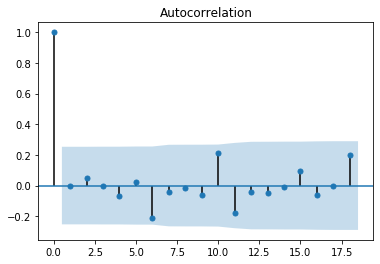

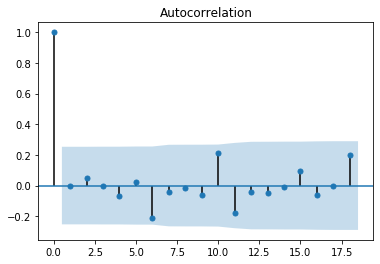

In [10]:
plot_acf(est.resid)

None of the values of the acf cross the significance threshold. There is no pattern of self-correlation among the residuals. In case of a pattern, we had to improve our model and consider including additional terms.

Another test is the Ljung-Box test, as an overall test of the randomness of a time series.

$H_0$: no exhibit of serial correlation <br>
$H_1$: exhibit of serial correlation

In [11]:
acorr_ljungbox(est.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,7.436124,0.68373


We apply the Ljung-Box test to the residuals of our model to assess its goodness of fit. We can not reject the null hypothesis. This is confirmation of what we just found by plotting the ACF of the residuals.

### forecasting

In [12]:
est.predict()

0      79401.483330
1      72080.493262
2      59379.085348
3      50446.348647
4      89303.312372
5     108549.499057
6      99715.364523
7     110141.896505
8      98927.208540
9      90676.533737
10     81418.974701
11     67180.766239
12     78314.028528
13     78824.469915
14     88176.987967
15     69263.899675
16     65241.614516
17     74165.369000
18     89174.857920
19     75526.517282
20     80618.940347
21     61986.576338
22     93989.113050
23     99779.589620
24     79242.684336
25     67107.866290
26     67954.524140
27     93685.391626
28     94379.759040
29     85893.159080
30     76854.413295
31     50851.446446
32     79118.765280
33     56933.799595
34     71048.621604
35     55222.838681
36     92595.279982
37     84468.633895
38     75379.722783
39     67212.253071
40     87597.085175
41     73922.442072
42     60301.426130
43     53349.526133
44     88866.138332
45     94249.014640
46     94639.465981
47     85967.359561
48     75058.430781
49     86912.519931


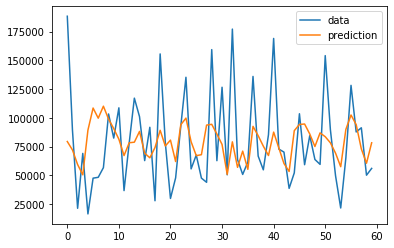

In [13]:
model_df = pd.DataFrame({"data": data[colnames[10]].values,"prediction": est.predict().values})
model_df.plot()

In [14]:
np.corrcoef(model_df["data"].values,model_df["prediction"].values)

array([[1.        , 0.32601147],
       [0.32601147, 1.        ]])

The correlation between the predicted and the actual ts is 0.33. This is okayish in some context. But sometimes, differencing the data will remove what seemed like a strong relationship and replace it with one that is essentially random. 

This is normally the case, when

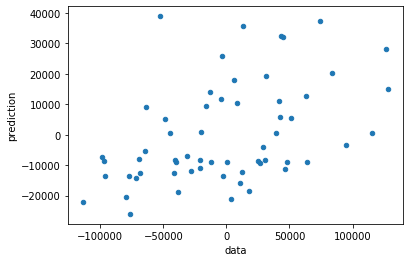

In [15]:
diff_data = pd.DataFrame([model_df["data"].diff(), model_df["prediction"].diff()]).T
diff_data.plot.scatter(x="data", y="prediction")

After differencing, there is aa some kind of pattern, which suggests our model is a meaningful one. 

In [16]:
est.get_forecast(steps=2).summary_frame(alpha=0.10)

Banking orders (2),mean,mean_se,mean_ci_lower,mean_ci_upper
60,84651.745852,35640.796704,26027.852127,143275.639578
61,92752.696503,35965.506654,33594.702437,151910.690569


### Moving average models

With the use of ACF the order of the MA model is determined.

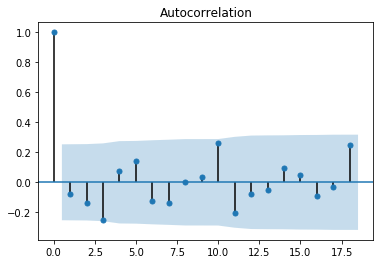

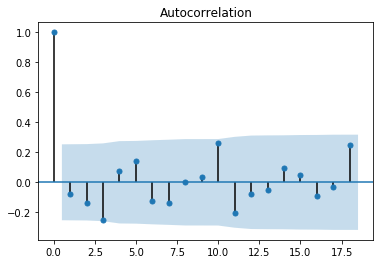

In [17]:
plot_acf(data[colnames[10]])

There are significant values at 3 (, but following my example, i add 9, too). 

In [18]:
model = ARIMA(data[colnames[10]], order=(0,0,9), enforce_invertibility=False)
est = model.fit_constrained({'ma.L1': 0, 'ma.L2': 0,  
                       'ma.L4': 0, 'ma.L5': 0, 'ma.L6': 0, 'ma.L7': 0, 'ma.L8': 0})
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(0, 0, 9)   Log Likelihood                -720.150
Date:                Wed, 17 Jun 2020   AIC                           1448.300
Time:                        16:39:14   BIC                           1456.677
Sample:                             0   HQIC                          1451.577
                                 - 60                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.94e+04   2085.761     38.068      0.000    7.53e+04    8.35e+04
ma.L1 (fixed)          0        nan        nan        nan         nan         nan
ma.L2 (fixed)          0        nan        nan        nan         nan         nan
ma.L3            -0.4838      0.111     -4.373      0.000      -0.701      -0.267
ma.L4 (fixed)          0        nan        nan        nan         nan         nan
ma.L5 (fixed)          0        nan        nan        nan         nan         nan
ma.L6 (fixed)          0        nan        nan        nan         nan         nan
ma.L7 (fixed)          0        nan        nan        nan         nan         nan
ma.L8 (fixed)          0        nan        nan        nan         nan         nan
ma.L9            -0.0093      0.093     -0.101      0.920      -0.191       0.172
sigma2          9.33e+08      0.011   8.15e+10      0.000    9.33e+08    9.33e+08
===================================================================================
Ljung-Box (Q):                       42.41   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.37   Prob(JB):                         0.17
Heteroskedasticity (H):               0.55   Skew:                             0.59
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+26. Standard errors may be unstable.
"""

In [19]:
acorr_ljungbox(est.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,7.470344,0.68042


We cannot reject the null hypothesis, that there is no temporal correlation between residual points. 

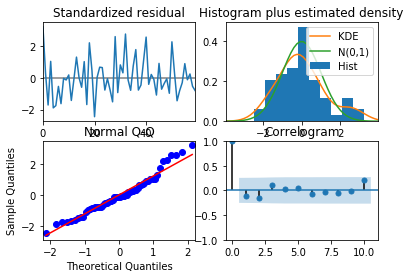

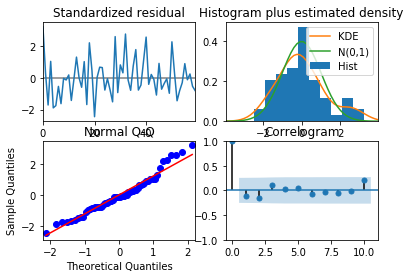

In [20]:
est.plot_diagnostics()

## Vector autoregression

In real world, there are several time series in parallel, that presumably related to one another. We can generate AR(p) model to the case of multiple variables. This kind of model influence variables to each other and are also influenced in return. The fitting is symmetric with respect to all variables. 

VAR mordels are often used in econometrics. 

In [21]:
model = VAR(data[colnames[10:12]], )

In [22]:
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Jun, 2020
Time:                     16:39:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    40.3338
Nobs:                     56.0000    HQIC:                   39.9352
Log likelihood:          -1252.04    FPE:                1.72373e+17
AIC:                      39.6828    Det(Omega_mle):     1.27944e+17
--------------------------------------------------------------------
Results for equation Banking orders (2)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                    109805.646213     27012.523645            4.065           0.000
L1.Banking orders (2)        -0.234623         0.145610           -1.611           0.107
L1.Banking orde

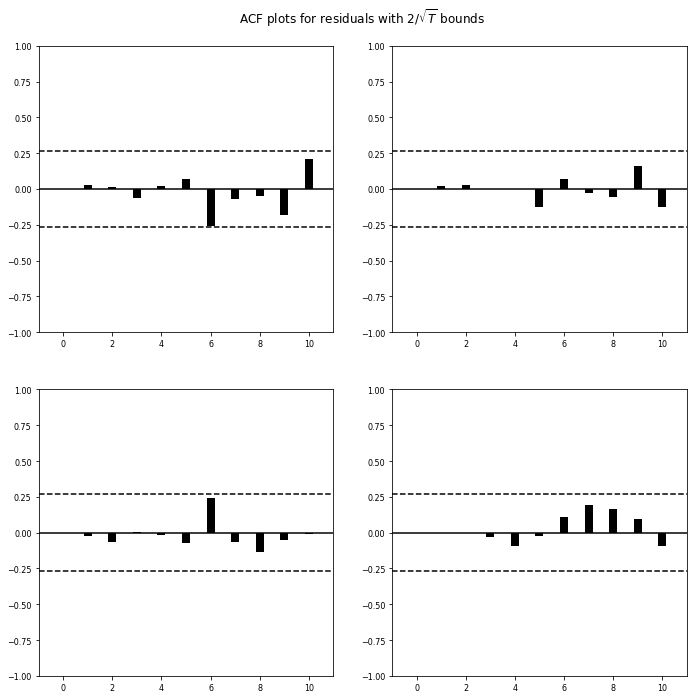

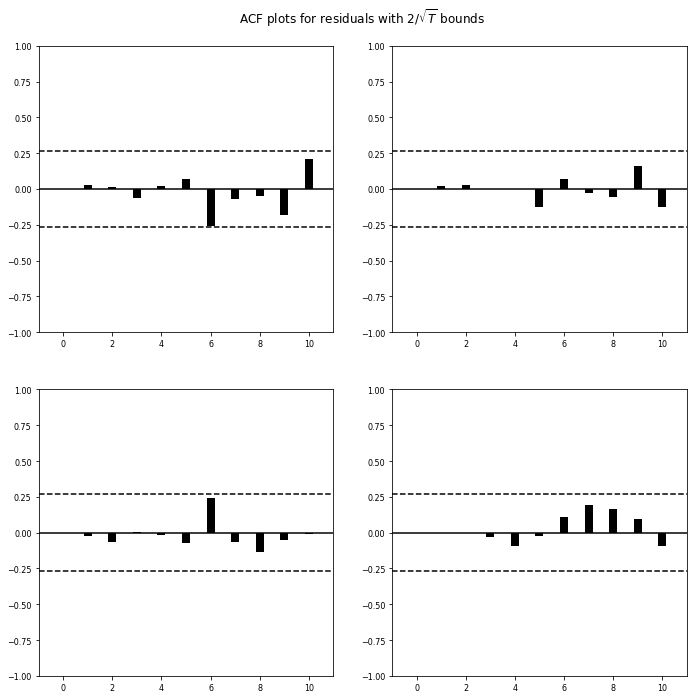

In [23]:
results.plot_acorr()